<a href="https://colab.research.google.com/github/BuczynskiRafal/ML/blob/main/supervised/02_regression/05_polynomial_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import bibliotek 

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn

# Ustawiam ziarno losowe 
np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)
sns.set(font_scale=1.3)
sklearn.__version__

'1.0.2'

# Polynomial regression - Regresja wielomianowa

Powszechnym wzorcem stosowanym w uczeniu maszynowym jest użycie modeli liniowych wytrenowanych na nieliniowych funkcjach danych. 
Podejście to utrzymuje szybkie działanie metod liniowych i zarazem umożliwia stoswanie metod liniowych dla znacznie szerszego zakresu danych. 
Przykładowo prosara regresja liniowa może zostać zastosowana przez skonstruowanie cech wielomianowych do modelów nielinowych. 
To implikuje fakt, iż nasz model regresji wielomianowej znajduje się w klasie modeli liniowych i może być rozwiązany za pomocą tych samych technik. 



# Model regresji liniowej R2

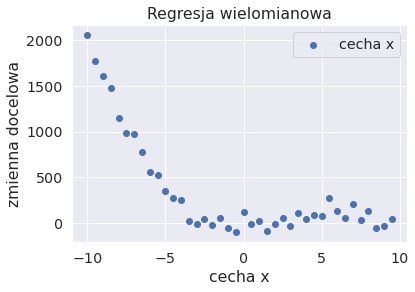

In [56]:
# wygenerowane danych 
x = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(40)
y = -x**3 + 10*x**2 - 2*x + 3 + noise
x = x.reshape(40, 1)

plt.figure(figsize=(6, 4))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(x, y, label='cecha x')
plt.legend()
plt.show()

# Model linoiwy

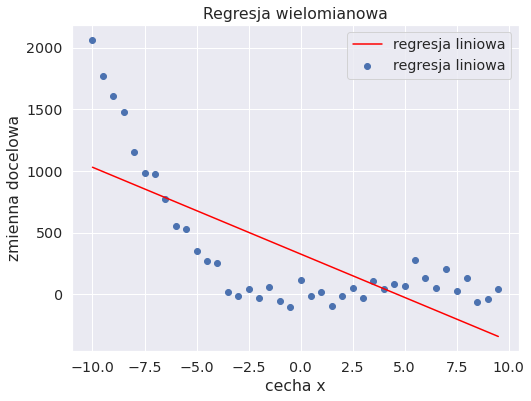

In [57]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x, y)
y_pred_lin = regressor.predict(x)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(x, y, label='regresja liniowa')
plt.plot(x, y_pred_lin, c='red', label='regresja liniowa')
plt.legend()
plt.show()

# Model R2

In [58]:
from sklearn.metrics import r2_score

# badam wskaxnik r2 score modelu
r2_score(y, y_pred_lin)

0.5342822962632471

# Ekstrakcja cech wielomianowych - stopien 2

In [59]:
# Dla lepszego zobrazowaia co się dzieje 

df = pd.DataFrame(data={'x':x.ravel()})
df.head()

,x
0,-10.0
1,-9.5
2,-9.0
3,-8.5
4,-8.0


In [60]:
# transformacja zmiennej x na cechy wielomianowe

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
x_poly

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

In [61]:
# rozmiar danych
x_poly.shape

(40, 3)

Dopasowanie modelu

In [62]:
# przygotowanie danych do regresji wielomianowej stopnia drugiego

df = pd.DataFrame(x_poly)
df.columns = ['1' ,'x', 'x^2']
df.head(10)

,1,x,x^2
0,1.0,-10.0,100.00
1,1.0,-9.5,90.25
2,1.0,-9.0,81.00
3,1.0,-8.5,72.25
4,1.0,-8.0,64.00
5,1.0,-7.5,56.25
6,1.0,-7.0,49.00
7,1.0,-6.5,42.25
8,1.0,-6.0,36.00
9,1.0,-5.5,30.25


Dopasowanie modelu - zastosowanie modelu linowego

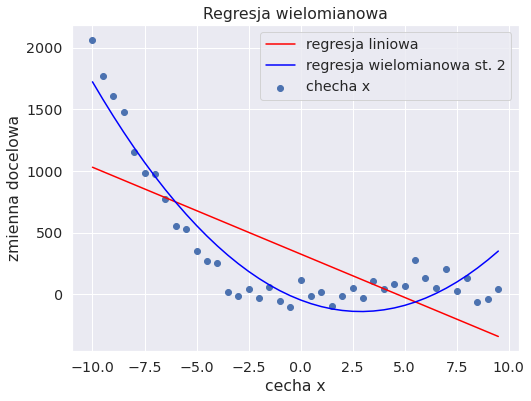

In [63]:
regressor_poly = LinearRegression()
regressor_poly.fit(x_poly, y)
y_pred_2 = regressor_poly.predict(x_poly)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(x, y, label='checha x')
plt.plot(x, y_pred_lin, c='red', label='regresja liniowa')
plt.plot(x, y_pred_2, c='blue', label='regresja wielomianowa st. 2')
plt.legend()
plt.show()

In [66]:
# wynik r2 score
r2_score(y, y_pred_2)

0.8951163003458433

# Ekstrakcja cech wielomianowych - stopien 3


In [70]:
poly = PolynomialFeatures(degree=3)

x_poly_3 = poly.fit_transform(x)
x_poly_3

array([[    1.   ,   -10.   ,   100.   , -1000.   ],
       [    1.   ,    -9.5  ,    90.25 ,  -857.375],
       [    1.   ,    -9.   ,    81.   ,  -729.   ],
       [    1.   ,    -8.5  ,    72.25 ,  -614.125],
       [    1.   ,    -8.   ,    64.   ,  -512.   ],
       [    1.   ,    -7.5  ,    56.25 ,  -421.875],
       [    1.   ,    -7.   ,    49.   ,  -343.   ],
       [    1.   ,    -6.5  ,    42.25 ,  -274.625],
       [    1.   ,    -6.   ,    36.   ,  -216.   ],
       [    1.   ,    -5.5  ,    30.25 ,  -166.375],
       [    1.   ,    -5.   ,    25.   ,  -125.   ],
       [    1.   ,    -4.5  ,    20.25 ,   -91.125],
       [    1.   ,    -4.   ,    16.   ,   -64.   ],
       [    1.   ,    -3.5  ,    12.25 ,   -42.875],
       [    1.   ,    -3.   ,     9.   ,   -27.   ],
       [    1.   ,    -2.5  ,     6.25 ,   -15.625],
       [    1.   ,    -2.   ,     4.   ,    -8.   ],
       [    1.   ,    -1.5  ,     2.25 ,    -3.375],
       [    1.   ,    -1.   ,     1.   ,    -1

Dopasowanie modelu

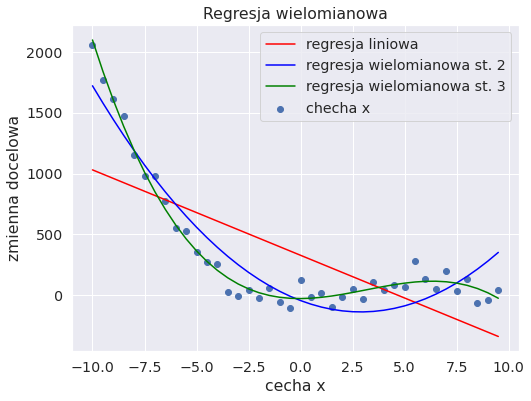

In [71]:
regressor_poly_3 = LinearRegression()
regressor_poly_3.fit(x_poly_3, y)

y_pred_3 = regressor_poly_3.predict(x_poly_3)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(x, y, label='checha x')
plt.plot(x, y_pred_lin, c='red', label='regresja liniowa')
plt.plot(x, y_pred_2, c='blue', label='regresja wielomianowa st. 2')
plt.plot(x, y_pred_3, c='green', label='regresja wielomianowa st. 3')
plt.legend()
plt.show()

In [72]:
# wynik r2 score
r2_score(y, y_pred_3)

0.9841708613657418

In [73]:
poly = PolynomialFeatures(degree=4)

x_poly_4 = poly.fit_transform(x)
x_poly_4

array([[    1.    ,   -10.    ,   100.    , -1000.    , 10000.    ],
       [    1.    ,    -9.5   ,    90.25  ,  -857.375 ,  8145.0625],
       [    1.    ,    -9.    ,    81.    ,  -729.    ,  6561.    ],
       [    1.    ,    -8.5   ,    72.25  ,  -614.125 ,  5220.0625],
       [    1.    ,    -8.    ,    64.    ,  -512.    ,  4096.    ],
       [    1.    ,    -7.5   ,    56.25  ,  -421.875 ,  3164.0625],
       [    1.    ,    -7.    ,    49.    ,  -343.    ,  2401.    ],
       [    1.    ,    -6.5   ,    42.25  ,  -274.625 ,  1785.0625],
       [    1.    ,    -6.    ,    36.    ,  -216.    ,  1296.    ],
       [    1.    ,    -5.5   ,    30.25  ,  -166.375 ,   915.0625],
       [    1.    ,    -5.    ,    25.    ,  -125.    ,   625.    ],
       [    1.    ,    -4.5   ,    20.25  ,   -91.125 ,   410.0625],
       [    1.    ,    -4.    ,    16.    ,   -64.    ,   256.    ],
       [    1.    ,    -3.5   ,    12.25  ,   -42.875 ,   150.0625],
       [    1.    ,    -3.    ,   

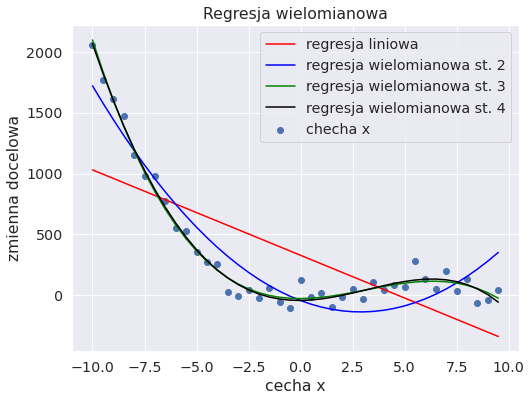

In [74]:
regressor_poly_4 = LinearRegression()
regressor_poly_4.fit(x_poly_4, y)

y_pred_4 = regressor_poly_4.predict(x_poly_4)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(x, y, label='checha x')
plt.plot(x, y_pred_lin, c='red', label='regresja liniowa')
plt.plot(x, y_pred_2, c='blue', label='regresja wielomianowa st. 2')
plt.plot(x, y_pred_3, c='green', label='regresja wielomianowa st. 3')
plt.plot(x, y_pred_4, c='black', label='regresja wielomianowa st. 4')

plt.legend()
plt.show()

In [76]:
# wynik r2 score
r2_score(y, y_pred_4)

0.984786760081455

# Porownanie metryk

In [81]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse


results = pd.DataFrame(data={
    'name': ['regresja liniowa', 'regresja wielomianowa st. 2', 'regresja wielomianowa st. 3'],
    'r2_score': [r2_score(y, y_pred_lin), r2_score(y, y_pred_2), r2_score(y, y_pred_3)],
    'mae': [mae(y, y_pred_lin), mae(y, y_pred_2), mae(y, y_pred_3)],
    'mse': [mse(y, y_pred_lin), mse(y, y_pred_2), mse(y, y_pred_3)],
    'rmse': [np.sqrt(mse(y, y_pred_lin)), np.sqrt(mse(y, y_pred_2)), np.sqrt(mse(y, y_pred_3))]    
    })
results

,name,r2_score,mae,mse,rmse
0,regresja liniowa,0.534282,316.267126,143775.153332,379.176942
1,regresja wielomianowa st. 2,0.895116,155.977929,32379.421866,179.942829
2,regresja wielomianowa st. 3,0.984171,57.572030,4886.730343,69.905152


Wykres metryki R2 score

In [82]:
px.bar(results, x='name', y='r2_score', width=700, title='Regresja wielomianowa - R2_score')


Wykres wskaźnika mae - im mniejsza wartość tym lepiej

In [83]:
px.bar(results, x='name', y='mae', width=700, title='regresja wielomianowa st. 2')


Wykres wskaźnika mse - im mniejsza wartość tym lepiej

In [84]:
px.bar(results, x='name', y='mse', width=700, title='Regresja wielomianowa - mean squared error')


Wykres wskaźnika rmse (pierwiastek z mse) - im mniejsza wartość tym lepiej

In [85]:
px.bar(results, x='name', y='rmse', width=700, title='Regresja wielomianowa - root mean squared error')
